In [1]:
# try:
#     import piplite
#     await piplite.install(['ipywidgets'])
# except ImportError:
#     pass

In [20]:
# ! pip install ipywidgets
# ! jupyter nbextension enable --py --sys-prefix widgetsnbextension
# ! pip install scikit-learn
# ! pip install matplotlib
# ! pip install jupyter-dash
! pip install pandas

  Using cached pandas-1.1.5-cp36-cp36m-manylinux1_x86_64.whl (9.5 MB)
     |████████████████████████████████| 498 kB 15.6 MB/s            


In [21]:
import retrieve
from elasticsearch import Elasticsearch
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.manifold import TSNE

In [4]:
def connectES(password, host):
    es = Elasticsearch(
    host,
    ca_certs="/homes/tjhk3/eecs-ir/ecir23-elastic/elasticsearch-8.3.2/config/certs/http_ca.crt",
    basic_auth=("elastic", password)
        )
    return es

In [5]:
def fetch_ranking_topk(query, index_name, model_name, k=100):
    ranking, weights = retrieve.retrieve(query, index_name, model_name)
    print('retrieved {} documents form {}'.format(len(ranking), index_name))
    return ranking[:k], weights[:k]

In [6]:
def display_field_weights(weights):
    
    X_embedded = TSNE(n_components=2,  init='random', perplexity=3).fit_transform(weights)

    X_embedded_lst = X_embedded.tolist()
    xs = [x[0] for x in X_embedded_lst]
    ys = [x[1] for x in X_embedded_lst]

    plt.scatter(xs, ys)

In [16]:
def show_results(ranking, weights):
    to_display = []
    for document, doc_weights in zip(ranking, weights.tolist()):
        document_source = es.get(index=index_name, id=document[0])
        score = document[1]
        to_show = document_source['_source'][field_to_show]
        to_display.append((to_show, ': ',score, doc_weights))
        print(to_show, ': ',score, doc_weights)
    return to_display

In [8]:
ES_PASSWORD = '8kDCKZ2ZwFhRAQmFy6JP'
es = connectES(ES_PASSWORD, "https://localhost:9200")
if es.ping():
    print('ES instance running succesfully')
else:
    print('ping did not work')

ES instance running succesfully


In [9]:
query = 'eurovision abba sweden'

In [10]:
index_name = 'dbpedia'

In [11]:
model_name = 'icfwLA'

In [12]:
# field_to_show = 'title'
field_to_show = 'label'

ES instance running succesfully
retrieved 4264 documents form dbpedia
sweden in the eurovis song contest 1975 :  1068.2371418590471 [10.68, 9.02, 1.24, 1.2, 1.2]
melodifestivalen 1974 :  1020.015967109784 [10.65, 2.18, 2.18, 2.1, 2.1]
waterloo ( abba song ) :  975.2087147866165 [19.03, 14.79, 9.46, 1.87, 1.86]
abba award and nomin :  963.8888941880858 [10.68, 9.02, 1.24, 1.2, 1.2]
congratul : 50 year of the eurovis song contest :  940.9789352078928 [10.13, 8.47, 0.69, 0.67, 8.05]
eurovis song contest 1975 :  907.5313130216739 [10.68, 9.02, 1.24, 1.2, 1.2]
gold : greatest hit ( abba album ) :  833.0515549443882 [10.13, 8.47, 0.69, 0.67, 8.05]
waterloo ( album ) :  819.9966550241106 [10.68, 1.24, 1.24, 1.2, 8.58]
ola brunkert :  805.6212820036917 [10.13, 8.47, 0.69, 0.67, 8.05]
abba discographi :  769.0329271153784 [11.62, 2.18, 2.18, 2.1, 2.1]
nygamm val :  738.8671070280097 [11.62, 2.18, 2.18, 2.1, 2.1]
honey , honey :  734.6597931355298 [11.62, 2.18, 2.18, 2.1, 2.1]
sweden in the euro

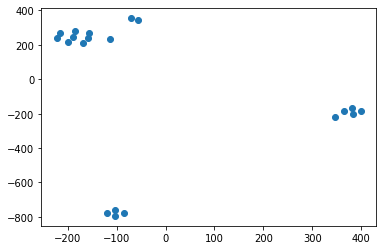

In [17]:
ranking, weights = fetch_ranking_topk(query, index_name, model_name, k=20)
weights = np.round(weights,2)
to_display = show_results(ranking, weights)
display_field_weights(weights)

In [23]:
import plotly.express as px
from jupyter_dash import JupyterDash
# import dash_core_components as dcc
from dash import dcc
# import dash_html_components as html
from dash import html
from dash.dependencies import Input, Output# Load Data
df = px.data.tips()# Build App
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("JupyterDash Demo"),
    dcc.Graph(id='graph'),
    html.Label([
        "colorscale",
        dcc.Dropdown(
            id='colorscale-dropdown', clearable=False,
            value='plasma', options=[
                {'label': c, 'value': c}
                for c in px.colors.named_colorscales()
            ])
    ]),
])# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("colorscale-dropdown", "value")]
)
def update_figure(colorscale):
    return px.scatter(
        df, x="total_bill", y="tip", color="size",
        color_continuous_scale=colorscale,
        render_mode="webgl", title="Tips"
    )# Run app and display result inline in the notebook
app.run_server(mode='inline')